# Phase 3 Data Science Training Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


file = r'.\\cifar-10-batches-py\\data_batch_1'
data_batch_1 = unpickle(file)


In [3]:
# code to check the type and format of data we're dealing with
type(data_batch_1)
len(data_batch_1)
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
# we can see that the images within the data_batch is represented as a 2d list
data_batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [5]:
# there are a total of 10000 lists in this 2d list, where each list contains 3072 elements
data_batch_1[b'data'].shape

(10000, 3072)

Show shape of the dataset

In [6]:
# reshaping a single image
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [7]:
# transposing the same single image
image = image.transpose(1,2,0)
print(image.shape)
image


(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

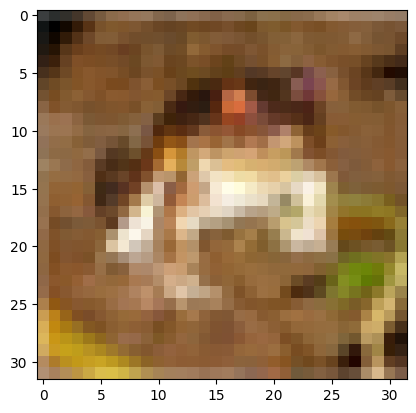

In [8]:
plt.imshow(image)

(10000, 32, 32, 3)


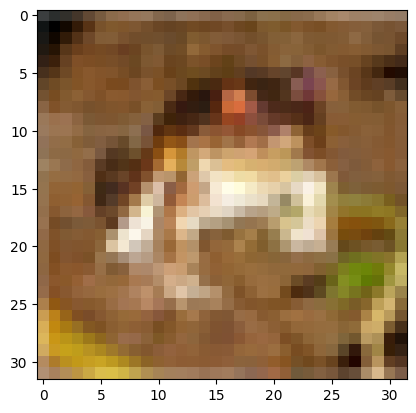

In [9]:
# reshaping/transposing the entire set of images
data = data_batch_1[b'data']
data = data.reshape(len(data), 3, 32, 32,).transpose(0, 2, 3, 1)
print(data.shape)

# display first image to make sure its working
plt.imshow(data[0])

Rendering 5 images from each label

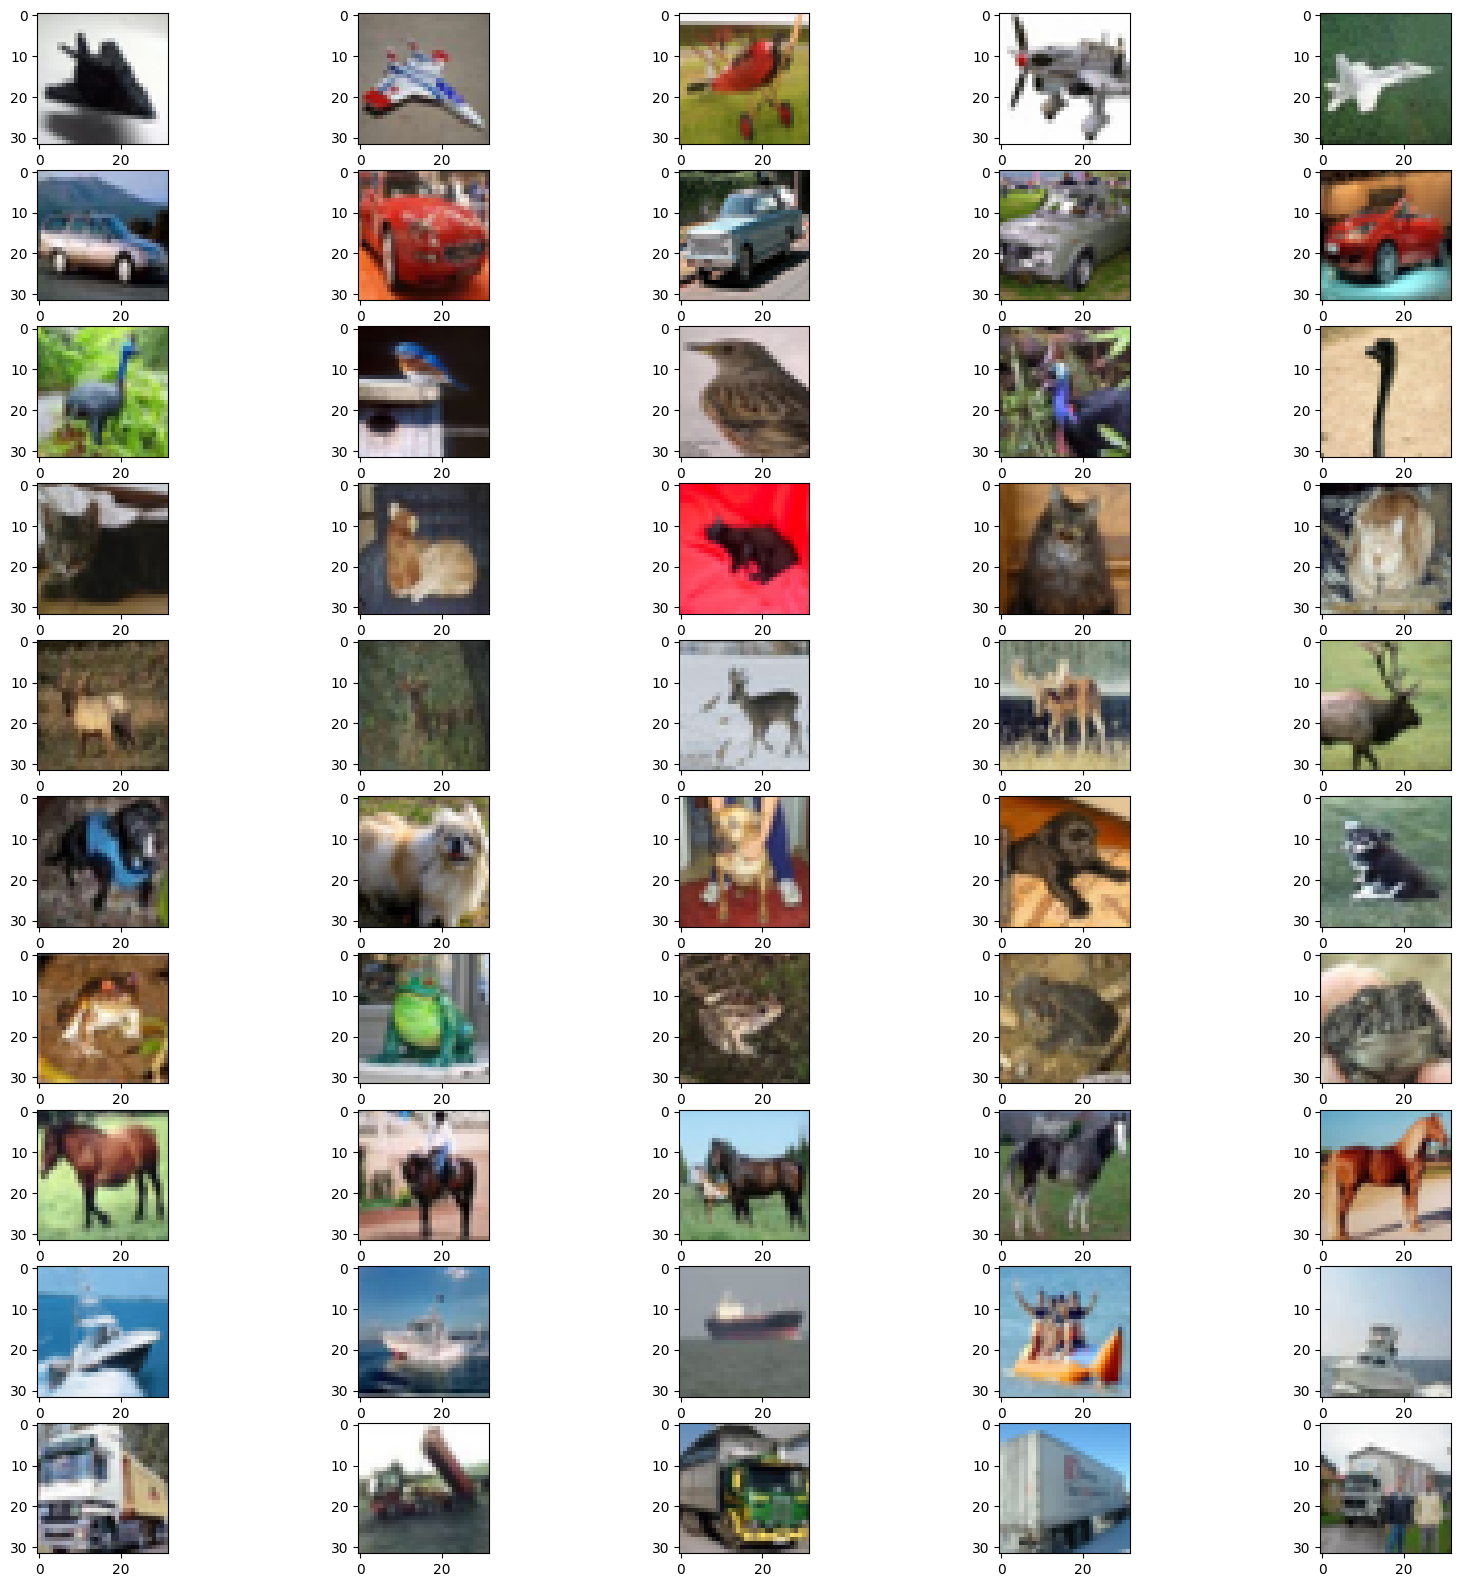

In [10]:
labels = data_batch_1[b'labels']
label_index_lists = [[],[],[],[],[],[],[],[],[],[]]

# for each label, store the first 5 indices of images corresponding to that label in a list
label_number = 0
for label_index_list in label_index_lists:
    for i in range(len(labels)):
        if labels[i] == label_number and len(label_index_list) < 5:
            label_index_list.append(i)
    label_number += 1

# plot the 5 images for each label
columns = 5
rows = 10
pos = 1
fig = plt.figure(figsize=(20,20))
for i  in range(10):
    for j in range(5):
        fig.add_subplot(rows, columns, pos)
        plt.imshow(data[label_index_lists[i][j]])
        pos += 1
  
plt.show()

# Data Processing

Obtain training and testing dataset

In [11]:
file = r'.\\cifar-10-batches-py\\test_batch'
test_batch = unpickle(file)

(10000, 32, 32, 3)


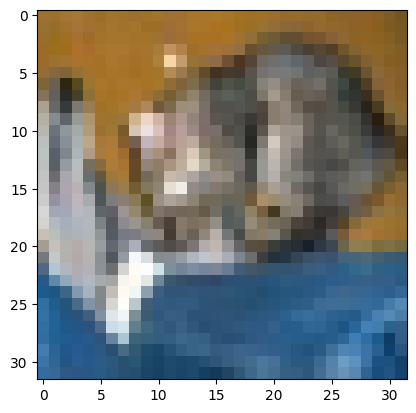

In [12]:
test_data = test_batch[b'data']
test_data = test_data.reshape(len(test_data), 3, 32, 32).transpose(0, 2, 3, 1)
print(test_data.shape)
plt.imshow(test_data[0])

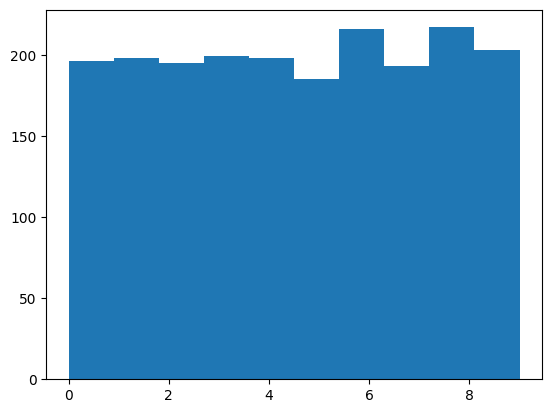

In [13]:
test_data = test_data[:2000]
img_labels = test_batch[b'labels'][:2000]
plt.hist(img_labels, bins = 10)
plt.show()

# judging by the histogram, there appears to be no data imbalance between the images.

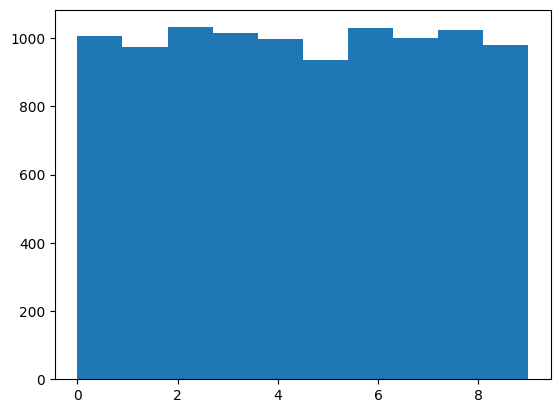

In [14]:
data_plot = data_batch_1[b'labels']
plt.hist(data_plot, bins=10)
plt.show()

# There does not seem to be a data imbalance between the images

In [15]:
train_x = data
train_y = data_batch_1[b'labels']

test_x = test_data
test_y = test_batch[b'labels'][:2000]

In [16]:
# train_x = np.random.randint(0,255,size=(10000,3,32,32))
# train_y = np.random.randint(0,255,size=(10000))

# test_x = np.random.randint(0,255,size=(1000,3,32,32))
# test_y = np.random.randint(0,255,size=(1000))

# Data Modelling

In [17]:
import tensorflow as tf
from tensorflow.python.keras import Input, layers, Sequential, optimizers, losses, callbacks, models
from datetime import datetime

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(np.array(train_x), np.array(train_y), epochs=10)

Epoch 1/10
313/313 [==============================] - 7s 20ms/step - loss: 2.7800 - accuracy: 0.2779
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 1.6378 - accuracy: 0.3931
Epoch 3/10
313/313 [==============================] - 6s 20ms/step - loss: 1.4387 - accuracy: 0.4744
Epoch 4/10
313/313 [==============================] - 6s 20ms/step - loss: 1.3175 - accuracy: 0.5237
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 1.1954 - accuracy: 0.5691
Epoch 6/10
313/313 [==============================] - 6s 21ms/step - loss: 1.0654 - accuracy: 0.6207
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 0.9463 - accuracy: 0.6559
Epoch 8/10
313/313 [==============================] - 6s 20ms/step - loss: 0.8419 - accuracy: 0.6996
Epoch 9/10
313/313 [==============================] - 6s 20ms/step - loss: 0.7446 - accuracy: 0.7312
Epoch 10/10
313/313 [==============================] - 6s 20ms/step - loss: 0.6460 - accura

In [22]:
cnn.evaluate(np.array(test_x),np.array(test_y))

63/63 [==============================] - 1s 7ms/step - loss: 1.6905 - accuracy: 0.5280


[1.6905016899108887, 0.527999997138977]

In [23]:
y_pred = cnn.predict(np.array(test_x))
y_pred[:5]

array([[1.7305594e-03, 3.6330341e-05, 1.6661167e-02, 7.1260703e-01,
        1.3160575e-03, 2.3484016e-02, 2.3440409e-01, 4.7187306e-05,
        8.5213250e-03, 1.1922972e-03],
       [1.2647109e-02, 7.1691900e-02, 8.2139952e-05, 3.5665068e-04,
        1.8680350e-07, 1.0944511e-06, 5.3674316e-06, 2.8795653e-06,
        6.2957996e-01, 2.8563270e-01],
       [2.7748123e-02, 2.2252993e-01, 1.9049292e-03, 1.6156308e-02,
        3.8740513e-04, 9.6274761e-04, 4.2967394e-04, 1.4226072e-04,
        6.9510436e-01, 3.4634233e-02],
       [9.2179233e-01, 3.7567967e-05, 5.6760954e-03, 7.9619343e-04,
        1.5959293e-03, 5.2927335e-06, 7.1195106e-04, 4.3944595e-04,
        6.8726033e-02, 2.1916766e-04],
       [1.3027446e-05, 1.1348071e-06, 1.0803455e-02, 1.6714273e-03,
        8.6737943e-01, 4.8375861e-03, 1.1501243e-01, 2.4968816e-04,
        2.3329663e-05, 8.4045350e-06]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[3, 8, 8, 0, 4, 6, 1, 4, 3, 1, 3, 9, 6, 7, 9]

In [25]:
test_y[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

'horse'

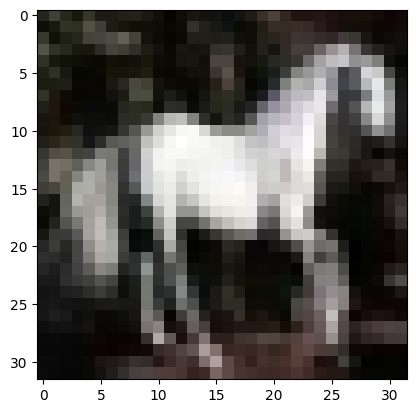

In [26]:
plt.imshow(test_x[13])
classes[7]

In [27]:
# def generateModel():
#     """
#     Make a Keras Sequential Model.
#     Feel free to change the layout of the layers.

#     Read more about keras here: https://keras.io/api/
#     Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
#     """
#     model = Sequential(name="Image_Recognition_Model")
#     model.add(Input(shape=(3,32,32))) # Input layer.

#     model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

#     model.add(layers.Dense(40, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
#     model.add(layers.Dense(25, activation="sigmoid")) # Example Hidden Layer 2. Has 25 Nodes.
#     model.add(layers.Dense(15, activation="tanh")) # Example Hidden Layer 3. Has 15 Nodes.

#     model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

#     model.compile(
#         optimizer=optimizers.SGD(learning_rate=0.01),
#         loss=losses.MeanAbsoluteError(),
#         metrics=['accuracy']
#     )

#     return model

In [28]:
# model = generateModel()

# log_dir = "output/logs/" + datetime.now().strftime("%Y-%m-%d-%H:%M:%S")

# # Callbacks for QoL.
# tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# model.fit(train_x, train_y,
#     validation_data=(test_x, test_y),
#     epochs=50000,
#     batch_size=1000, # Set this to a lower number if your computer spec is bad.
#     callbacks=[tensorboard_callback, earlystop_callback],
#     # verbose=0 # Uncomment this line to reduce the printing on console.
# )

In [29]:
# model.save('output/my_model')